# Picturehouse Creators Business Problem

Author: Panashe Mutamba

## Table of Contents

- Introduction
- Data Handling
- Data Analysis
- Conclusion


## Introduction

This our exploratory data analysis of TMDB registered movies. We will be answering the following:
    
1. We have over 10,000 movies with attributes such as budgets, genres and popularity. OUr main points of interest are:
- How the movie industry ahs changed over time?
    - What are the most popular genres?
    - How has genre demand changed over the years?
    - Which actors have become more desirable over the years?
    
- What attributes especially result in higher revenues?
    - Which cast members cintributed to high revenues especially leading actors?
    - Which director contributed to the high revenue movies?
    - What are the keywords that attract peple to attend these high revenue movies?
    
2. Data handling. First we must gather, load and check the data. Making the necessary augmentations to account for duplicates and erroneus data. For smooth analysis.

3. Data Analysis. We use visualisations to ascertain patterns in the data, and ascertain good ranges and well based options.

4. Conclusion. We sum up the patterns found and make predictions.
    
We aim to find the following:
- A name for your  movie
- A tagline for your movie
- The genre of your movie 
- The actors you would use
- The director you would employ
- When you would release your movie

Notes:
- Revenues and budgets are in $
- Popularity is updated often, contingent on user ratings, relase date and site views

    


In [5]:
# import Libraries to be used
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
#import gc
#gc.collect()
%matplotlib inline


## Data Handling

Load, Checking, Cleaning

In this stage, we will load the data provided to us by Picturehouse into a dataframe. 
Then we will check its quality. Errors, miissing data and problems with data quality will be checked.
If any of these are present augmentations to the data shall be made such as removing duplicates or 
replacing erroneus information to ensure clean data for analysis.


In [6]:
data = pd.read_csv('MovieDetails.csv', sep = ",")
data.head()
pd.set_option('display.float_format', lambda x: '%.5f' % x)

There is a large amount of information present here but we do not have a column to account for the profits made by each movie. So we will add one using budget and revenue.

In [7]:
data.columns

Index(['id', 'imdb_id', 'original_title', 'homepage', 'director', 'tagline',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'release_year', 'vote_average', 'vote_count',
       'popularity', 'cast', 'support_actor1', 'support_actor2',
       'support_actor3', 'support_actor4', 'budget', 'revenue', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
data['profit']=data['revenue']-data['budget']

In [9]:
# Check the number of rows and columns
data.shape

(10866, 26)

In [10]:
# Check the dataset summary and look for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   original_title        10866 non-null  object 
 3   homepage              2936 non-null   object 
 4   director              10822 non-null  object 
 5   tagline               8043 non-null   object 
 6   keywords              9373 non-null   object 
 7   overview              10862 non-null  object 
 8   runtime               10866 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  release_year          10866 non-null  int64  
 13  vote_average          10856 non-null  float64
 14  vote_count            10856 non-null  float64
 15  popularity         

As we can see within the Non-Null column, there are clearly missing rows of data so they need to be removed as they detract from the questions we aim to answer.

In [11]:
# Check column statistics
data.describe()

,id,runtime,release_year,vote_average,vote_count,popularity,budget,revenue,budget_adj,revenue_adj,profit
count,10866.00000,10866.00000,10866.00000,10856.00000,10856.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000
mean,66064.17743,102.07086,2001.32266,5.97377,217.57424,0.64644,14625701.09415,39823319.79339,17551039.82290,51364363.25316,25197618.69925
std,92130.13656,31.38141,12.81294,0.93461,575.85193,1.00018,30913213.83144,117003486.58208,34306155.72293,144632485.03773,96587985.97157
min,5.00000,0.00000,1960.00000,1.50000,10.00000,0.00007,0.00000,0.00000,0.00000,0.00000,-413912431.00000
25%,10596.25000,90.00000,1995.00000,5.40000,17.00000,0.20758,0.00000,0.00000,0.00000,0.00000,0.00000
50%,20669.00000,99.00000,2006.00000,6.00000,38.00000,0.38386,0.00000,0.00000,0.00000,0.00000,0.00000
75%,75610.00000,111.00000,2011.00000,6.60000,146.00000,0.71382,15000000.00000,24000000.00000,20853251.08000,33697095.71750,9083358.00000
max,417859.00000,900.00000,2015.00000,9.20000,9767.00000,32.98576,425000000.00000,2781505847.00000,425000000.00000,2827123750.00000,2544505847.00000


- Votes range from 1.5 to 9.2 most likely out of a score of 10
- Popularity ranges from 0 - 33 with an average of 0.6 (33 seems very large, it may be an outlier)
- Release years range from 1960 - 2015
- Budget ranges from 0 - 425 million 
- Revenue ranges from 0 - 2.8 billion





Now we will begin the data cleaning after obtaining a good picture of the data in its current state.
- Unnecessary coulumns will be dropped
- Columns of interest will be kept
- Release sate will be replaced with release year
- id will be kept in case new data comes to light which wwe may want to merge with current dataset

In [12]:
sum(data.duplicated())

1

One duplicate currently exists so we will drop it and check if there are any more.

In [13]:
data.drop_duplicates(inplace=True)
print(sum(data.duplicated()))
print(data.shape)


0
(10865, 26)


Next will check for missing values.

In [14]:
data.isnull().sum()

id                         0
imdb_id                   10
original_title             0
homepage                7929
director                  44
tagline                 2823
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
vote_average              10
vote_count                10
popularity                 0
cast                       0
support_actor1             0
support_actor2             0
support_actor3             0
support_actor4             0
budget                     0
revenue                    0
budget_adj                 0
revenue_adj                0
profit                     0
dtype: int64

There are movies without directors or genres which should be removed. We will check the dataset again after doing this

In [15]:
data.isnull().sum()


id                         0
imdb_id                   10
original_title             0
homepage                7929
director                  44
tagline                 2823
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
vote_average              10
vote_count                10
popularity                 0
cast                       0
support_actor1             0
support_actor2             0
support_actor3             0
support_actor4             0
budget                     0
revenue                    0
budget_adj                 0
revenue_adj                0
profit                     0
dtype: int64

In [16]:
data=data.drop(['homepage','id','imdb_id','overview'],axis=1)
data['genres']=data['genres'].fillna(0)
data['director']=data['director'].fillna(0)
data['vote_average']=data['vote_average'].fillna(0)
data['vote_count']=data['vote_count'].fillna(0)
data['tagline']=data['tagline'].fillna(0)
data['keywords']=data['keywords'].fillna(0)
data['production_companies']=data['production_companies'].fillna(0)


We have decided to focus on columns of interest and drop the unnecessary ones. Erroneus values will be dropped from future graphs.

In [17]:
data.isnull().sum()

original_title          0
director                0
tagline                 0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
release_year            0
vote_average            0
vote_count              0
popularity              0
cast                    0
support_actor1          0
support_actor2          0
support_actor3          0
support_actor4          0
budget                  0
revenue                 0
budget_adj              0
revenue_adj             0
profit                  0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10865 non-null  object 
 1   director              10865 non-null  object 
 2   tagline               10865 non-null  object 
 3   keywords              10865 non-null  object 
 4   runtime               10865 non-null  int64  
 5   genres                10865 non-null  object 
 6   production_companies  10865 non-null  object 
 7   release_date          10865 non-null  object 
 8   release_year          10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  vote_count            10865 non-null  float64
 11  popularity            10865 non-null  float64
 12  cast                  10865 non-null  object 
 13  support_actor1        10865 non-null  object 
 14  support_actor2        10865 non-null  object 
 15  support_actor3     

There are 10865 rows and 21 columns. Columns have been changed accordingly a few minor changes may need to be made once a greater understanding of certainn columns is established.

In [19]:
data['profit'].clip(lower=0)

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10861             0
10862             0
10863             0
10864             0
10865             0
Name: profit, Length: 10865, dtype: int64

We want profits greater than zero so we will simply count negative values as zeroes.

In [20]:
data['profit ratio']= (data['profit']/data['revenue'])*100
#data.sort_values(['profit ratio'], ascending=False)

In [21]:
bin_edges=[0,1000000,1000000000,2.750137e+09]
bin_names=['undermillion','millions','billions']
data['revenue_position']=pd.cut(data['revenue'], bin_edges, labels=bin_names)


With this we are able to allocate revenue amounts into easily understandable categories.

In [22]:
data['revenue_position'].value_counts()

millions        4301
undermillion     526
billions          21
Name: revenue_position, dtype: int64

In [23]:
data.isnull().sum()

original_title             0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
release_year               0
vote_average               0
vote_count                 0
popularity                 0
cast                       0
support_actor1             0
support_actor2             0
support_actor3             0
support_actor4             0
budget                     0
revenue                    0
budget_adj                 0
revenue_adj                0
profit                     0
profit ratio            4701
revenue_position        6017
dtype: int64

In [24]:
data.revenue_position.fillna('undermillion', inplace=True)
data.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   original_title        10865 non-null  object  
 1   director              10865 non-null  object  
 2   tagline               10865 non-null  object  
 3   keywords              10865 non-null  object  
 4   runtime               10865 non-null  int64   
 5   genres                10865 non-null  object  
 6   production_companies  10865 non-null  object  
 7   release_date          10865 non-null  object  
 8   release_year          10865 non-null  int64   
 9   vote_average          10865 non-null  float64 
 10  vote_count            10865 non-null  float64 
 11  popularity            10865 non-null  float64 
 12  cast                  10865 non-null  object  
 13  support_actor1        10865 non-null  object  
 14  support_actor2        10865 non-null  object  
 15  su

Now we want to allocate each film title to their respective decade.

In [25]:
bin_edges = [1959, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['sixties', 'seventies', 'eighties', 'nineties', 'two-thousands', 'two-thousand-tens']
data['decades'] = pd.cut(data['release_year'], bin_edges, labels=bin_names)



We will now start splitting the columns with lists of values.

In [26]:
split_genre = data['genres'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_genre.name = 'genre_split'
data_split_genre = data.drop(['genres'], axis=1).join(split_genre)

In [27]:
print(data_split_genre.info())
print(sum(data_split_genre.duplicated()))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26978 entries, 0 to 10865
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   original_title        26978 non-null  object  
 1   director              26978 non-null  object  
 2   tagline               26978 non-null  object  
 3   keywords              26978 non-null  object  
 4   runtime               26978 non-null  int64   
 5   production_companies  26978 non-null  object  
 6   release_date          26978 non-null  object  
 7   release_year          26978 non-null  int64   
 8   vote_average          26978 non-null  float64 
 9   vote_count            26978 non-null  float64 
 10  popularity            26978 non-null  float64 
 11  cast                  26978 non-null  object  
 12  support_actor1        26978 non-null  object  
 13  support_actor2        26978 non-null  object  
 14  support_actor3        26978 non-null  object  
 15  su

We have 26,983 rows after having over 10,000 and 30 columns as we would expect and no duplicates.

In [28]:
data_split_genre.isnull().sum()

original_title              0
director                    0
tagline                     0
keywords                    0
runtime                     0
production_companies        0
release_date                0
release_year                0
vote_average                0
vote_count                  0
popularity                  0
cast                        0
support_actor1              0
support_actor2              0
support_actor3              0
support_actor4              0
budget                      0
revenue                     0
budget_adj                  0
revenue_adj                 0
profit                      0
profit ratio            11015
revenue_position            0
decades                     0
genre_split                23
dtype: int64

In [29]:
split_keywords = data['keywords'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_keywords.name = 'keywords_split'
data_split_keywords = data.drop(['keywords'], axis=1).join(split_keywords)

In [30]:
print(data_split_keywords.info())
print(sum(data_split_keywords.duplicated()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38939 entries, 0 to 10865
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   original_title        38939 non-null  object  
 1   director              38939 non-null  object  
 2   tagline               38939 non-null  object  
 3   runtime               38939 non-null  int64   
 4   genres                38939 non-null  object  
 5   production_companies  38939 non-null  object  
 6   release_date          38939 non-null  object  
 7   release_year          38939 non-null  int64   
 8   vote_average          38939 non-null  float64 
 9   vote_count            38939 non-null  float64 
 10  popularity            38939 non-null  float64 
 11  cast                  38939 non-null  object  
 12  support_actor1        38939 non-null  object  
 13  support_actor2        38939 non-null  object  
 14  support_actor3        38939 non-null  object  
 15  su

In [31]:
split_tagline = data['tagline'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_tagline.name = 'tagline_split'
data_split_tagline = data.drop(['tagline'], axis=1).join(split_tagline)

In [32]:
print(data_split_tagline.info())
print(sum(data_split_tagline.duplicated()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10867 entries, 0 to 10865
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   original_title        10867 non-null  object  
 1   director              10867 non-null  object  
 2   keywords              10867 non-null  object  
 3   runtime               10867 non-null  int64   
 4   genres                10867 non-null  object  
 5   production_companies  10867 non-null  object  
 6   release_date          10867 non-null  object  
 7   release_year          10867 non-null  int64   
 8   vote_average          10867 non-null  float64 
 9   vote_count            10867 non-null  float64 
 10  popularity            10867 non-null  float64 
 11  cast                  10867 non-null  object  
 12  support_actor1        10867 non-null  object  
 13  support_actor2        10867 non-null  object  
 14  support_actor3        10867 non-null  object  
 15  su

In [33]:
data['leading_actor']=data['cast'].apply(lambda x: x.split('|')[0])

As of now we have four dataframes:data, data_split_genre, data_split_keywords, data_split_tagline.
These data frames will be used for our data exploration.

# Exploratory Data Analysis

We have now cleaned our data, now let us gain explore the data. In this sectin we will create 
visualisations and use statistics to answer our questions.

### What genres are the most popular?

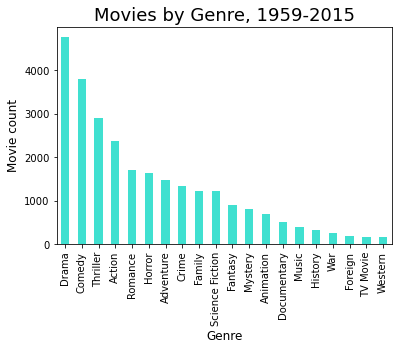

In [34]:
data_split_genre['genre_split'].value_counts().plot(kind='bar', color='turquoise');
plt.title('Movies by Genre, 1959-2015', size=18)
plt.xlabel('Genre', size=12)
plt.ylabel('Movie count', size=12);

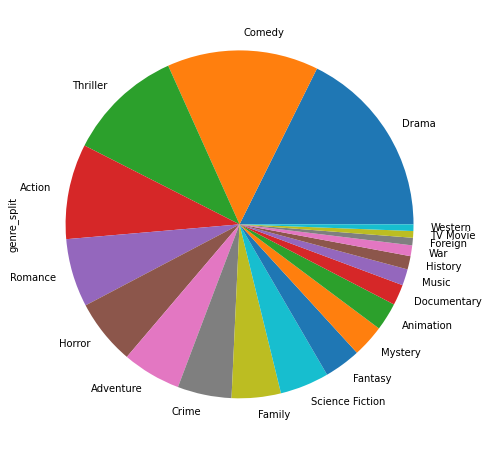

In [35]:
data_split_genre['genre_split'].value_counts().plot(kind='pie', figsize=(8,8))


The pie chart presents a better visual as we can see Action, Thrillers Comedies and Dramas make up 50% of all movies. Westerns, Foreigns and TV Movies are the least popular genres.

### Through the decades which genres are the most popular?

In [36]:
genres_decades=data_split_genre.groupby(['decades'])['genre_split'].value_counts()
genres_decades.groupby(level=0).nlargest(4)

decades            decades            genre_split
sixties            sixties            Drama           187
                                      Comedy          125
                                      Action           89
                                      Romance          73
seventies          seventies          Drama           252
                                      Thriller        168
                                      Action          137
                                      Comedy          135
eighties           eighties           Comedy          451
                                      Drama           451
                                      Action          284
                                      Thriller        281
nineties           nineties           Drama           903
                                      Comedy          786
                                      Thriller        512
                                      Action          463
two-thousands      two

Drama appears to be the most popular followed by Comedy, Thriller then Action. Even still they have all seen an increase in production over the years.

### Through the decades which leading actor got the most acting credit?

In [37]:
genres_decades=data.groupby(['decades'])['leading_actor'].value_counts()
genres_decades.groupby(level=0).nlargest(4)

decades            decades            leading_actor        
sixties            sixties            John Wayne               15
                                      Vincent Price            12
                                      Burt Lancaster            9
                                      Paul Newman               9
seventies          seventies          Clint Eastwood           15
                                      Sean Connery              9
                                      Woody Allen               9
                                      Charlton Heston           8
eighties           eighties           Arnold Schwarzenegger    12
                                      Sylvester Stallone       12
                                      Clint Eastwood           11
                                      Mel Gibson               11
nineties           nineties           Bruce Willis             17
                                      Denzel Washington        14
                

Nicolas cage has had the most credits followed by Steven Seagal, Bruce Willis and John Wayne but naturally we are only focusing on the most active actors in this decade and the previous one.

### What genres are the most popular throught the months?

In [38]:
data_split_genre['month'] = pd.DatetimeIndex(data_split_genre['release_date']).month

In [39]:
genres_decades=data_split_genre.groupby(['month'])['genre_split'].value_counts()
genres_decades.groupby(level=0).nlargest(5)

month  month  genre_split
1      1      Drama          534
              Comedy         417
              Thriller       327
              Action         261
              Horror         221
2      2      Drama          304
              Comedy         217
              Thriller       178
              Action         143
              Romance        117
3      3      Drama          320
              Comedy         292
              Thriller       190
              Action         172
              Romance        116
4      4      Drama          318
              Comedy         286
              Thriller       224
              Action         189
              Romance        127
5      5      Drama          382
              Comedy         277
              Thriller       224
              Action         201
              Romance        137
6      6      Drama          342
              Comedy         327
              Action         216
              Thriller       203
              Rom

For every month a Drama is released along with a Comedy, Action and a Thriller. 
Dramas again are the most frequent.

### How have genres performed overall?

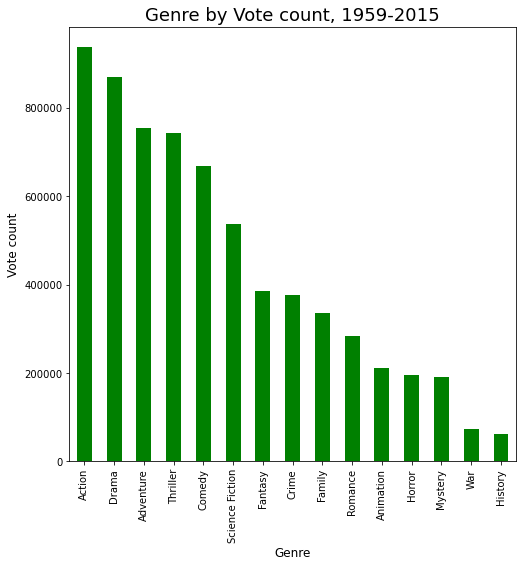

In [40]:
data_groupby_genre = data_split_genre.groupby(['genre_split'])['vote_count'].sum()
d=data_groupby_genre.nlargest(15)
plt.figure(figsize = (8, 8))
plt.title('Genre by Vote count, 1959-2015', size=18)
d.plot(kind='bar', color='green')
ax = plt.xticks(rotation=90)
plt.xlabel('Genre', size=12)
plt.ylabel('Vote count', size=12);

It would appear people are more inclined to to vote to vote for Action, Drama , Adventure, 
Thriller, Comedy and Science Fiction movies, but are less inclined to show interest toward War 
and Historical movies.

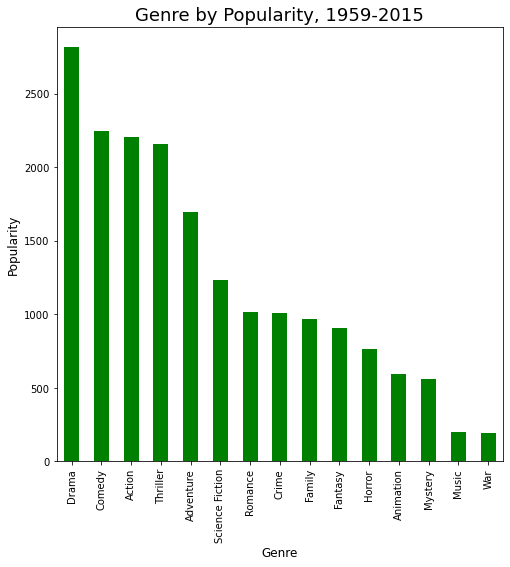

In [41]:
data_groupby_genre2 = data_split_genre.groupby(['genre_split'])['popularity'].sum()
d=data_groupby_genre2.nlargest(15)
plt.figure(figsize = (8, 8))
plt.title('Genre by Popularity, 1959-2015', size=18)
d.plot(kind='bar', color='green')
ax = plt.xticks(rotation=90)
plt.xlabel('Genre', size=12)
plt.ylabel('Popularity', size=12);

Again Dramas has shown the most interest followed by Comedy, Action , Thriller, 
Adventure and Science Fiction movies. The least interest was shown in Music and 
War movies.

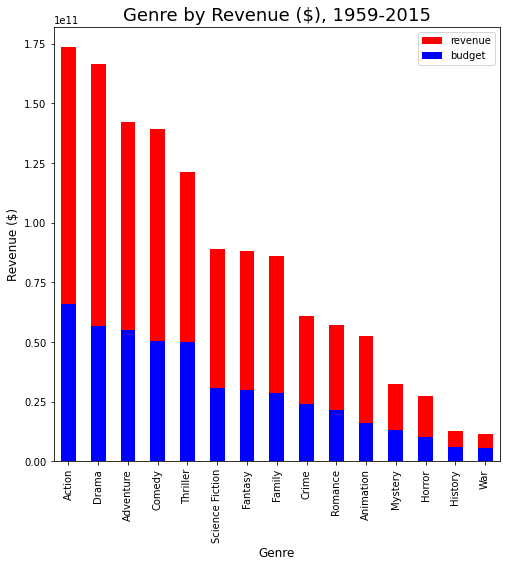

In [42]:
data_groupby_genre3 = data_split_genre.groupby(['genre_split'])['revenue'].sum()
data_groupby_genre4 = data_split_genre.groupby(['genre_split'])['budget'].sum()
d=data_groupby_genre3.nlargest(15)
e=data_groupby_genre4.nlargest(15)
plt.figure(figsize = (8, 8))
plt.title('Genre by Revenue ($), 1959-2015', size=18)
d.plot(kind='bar', color='red')
e.plot(kind='bar', color='blue')
plt.legend()
ax = plt.xticks(rotation=90)
plt.xlabel('Genre', size=12)
plt.ylabel('Revenue ($)', size=12);

Action movies earn the most revenue in comparison to their budget, 
followed by Dramas which are a close second, then Adventure, Comedy and Thriller movies. 
Historical and War movies earn the least as excpected

In [43]:
data['popularity']

0       32.98576
1       28.41994
2       13.11251
3       11.17310
4        9.33501
          ...   
10861    0.08060
10862    0.06554
10863    0.06514
10864    0.06432
10865    0.03592
Name: popularity, Length: 10865, dtype: float64

### How has demand for movies based on novels increased over time?

Text(0, 0.5, 'Movie count')

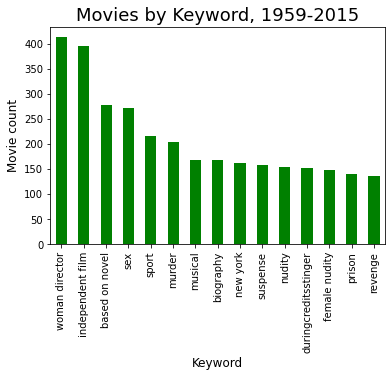

In [44]:
data_split_keywords['keywords_split'].value_counts().nlargest(15).plot(kind='bar', color='green')
plt.title('Movies by Keyword, 1959-2015', size=18)
plt.xlabel('Keyword', size=12)
plt.ylabel('Movie count', size=12)

Woman director movies and independednt films have been in production the most.
Followed by movies based on novels, sex and sport. Movies based on novels seem to be very 
popular with production companies.

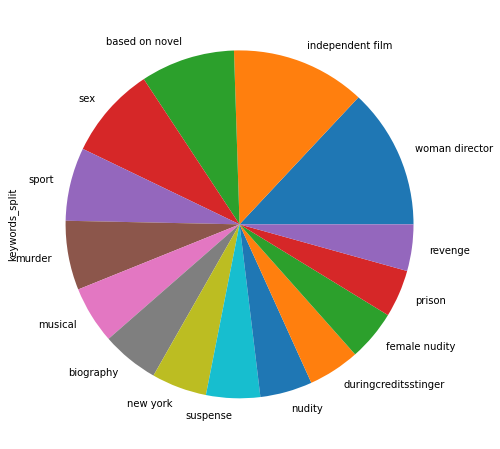

In [45]:
data_split_keywords['keywords_split'].value_counts().nlargest(15).plot(kind='pie', figsize=(8,8))

About 50% of movies is encompassed by sport, sex basedon novel, independent film and woman director.

In [46]:
keywords_decades=data_split_keywords.groupby(['decades'])['keywords_split'].value_counts()
keywords_decades.groupby(level=0).nlargest(3)

decades            decades            keywords_split  
sixties            sixties            based on novel       19
                                      world war ii         17
                                      musical              16
seventies          seventies          female nudity        24
                                      based on novel       21
                                      suspense             20
eighties           eighties           nudity               39
                                      sex                  36
                                      female nudity        31
nineties           nineties           independent film     92
                                      sex                  58
                                      sport                55
two-thousands      two-thousands      independent film    233
                                      woman director      131
                                      sex                 117
two-thousand-te

Woman director movies have become very frequent since the last decade and 
there has been an influx in based on novel movies.

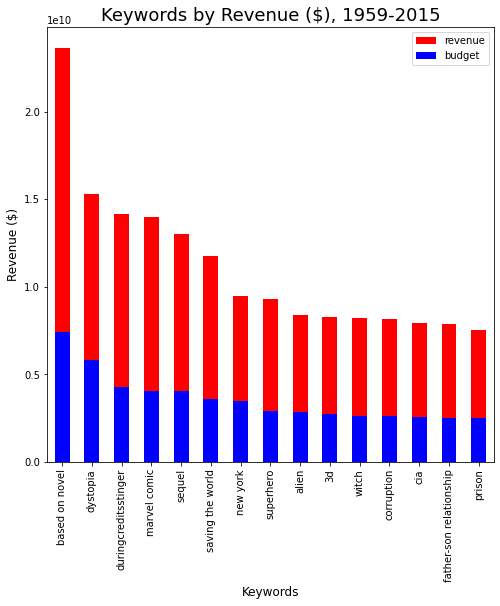

In [47]:
data_groupby_revenue = data_split_keywords.groupby(['keywords_split'])['revenue'].sum()
data_groupby_revenue1 = data_split_keywords.groupby(['keywords_split'])['budget'].sum()
d=data_groupby_revenue.nlargest(15)
e=data_groupby_revenue1.nlargest(15)
plt.figure(figsize = (8, 8))
plt.title('Keywords by Revenue ($), 1959-2015', size=18)
d.plot(kind='bar', color='red')
e.plot(kind='bar', color='blue')
plt.legend()
ax = plt.xticks(rotation=90)
plt.xlabel('Keywords', size=12)
plt.ylabel('Revenue ($)', size=12);

Movies based on novels have typically grossed the most, followed by dytopia, 
duringcreditstinger and marvel comic

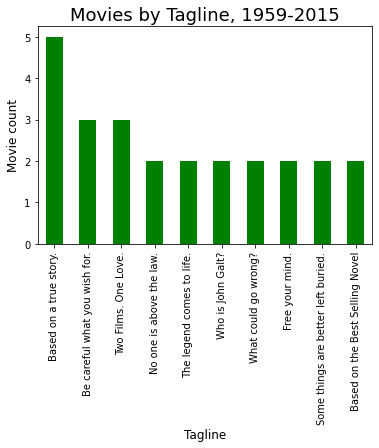

In [48]:
data_split_tagline['tagline_split'].value_counts().nlargest(10).plot(kind='bar', color='green');
plt.title('Movies by Tagline, 1959-2015', size=18)
plt.xlabel('Tagline', size=12)
plt.ylabel('Movie count', size=12);

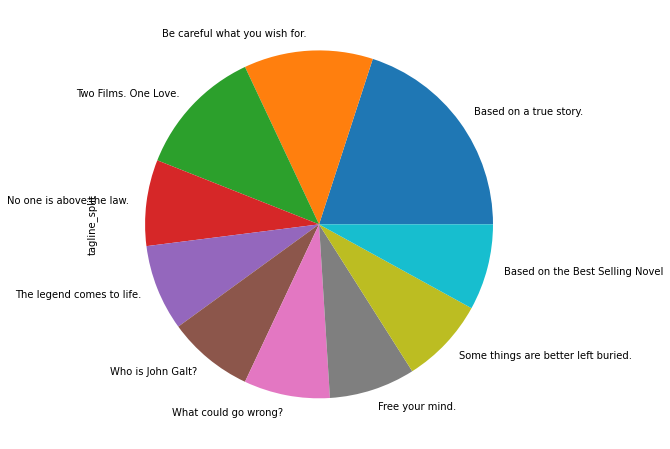

In [49]:
data_split_tagline['tagline_split'].value_counts().nlargest(10).plot(kind='pie', figsize=(8
,8))

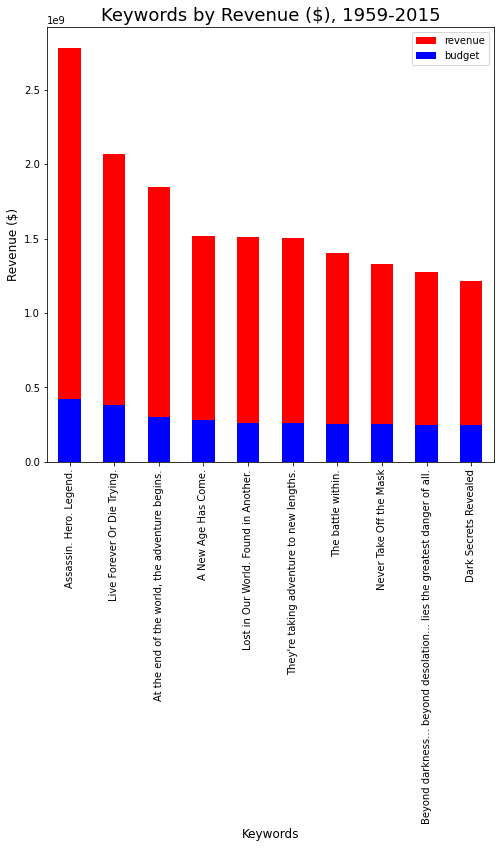

In [50]:
data_groupby_revenue2 = data_split_tagline.groupby(['tagline_split'])['revenue'].sum()
data_groupby_revenue3 = data_split_tagline.groupby(['tagline_split'])['budget'].sum()
d=data_groupby_revenue2.nlargest(10)
e=data_groupby_revenue3.nlargest(10)
plt.figure(figsize = (8, 8))
plt.title('Keywords by Revenue ($), 1959-2015', size=18)
d.plot(kind='bar', color='red')
e.plot(kind='bar', color='blue')
plt.legend()
ax = plt.xticks(rotation=90)
plt.xlabel('Keywords', size=12)
plt.ylabel('Revenue ($)', size=12);

Movie wth the Assassin, Hero, Legend tagline have grossed the most followed by 
Live Forever Or Die Trying and then At the end of the world, the adventure begins.

Text(0.5, 1.0, 'Release_year by Runtime, 1959-2015')

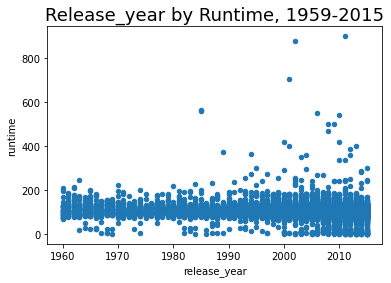

In [51]:
data.plot(x='release_year', y='runtime', kind='scatter');
plt.title('Release_year by Runtime, 1959-2015', size=18)


Text(0.5, 1.0, 'Revenue by Budget, 1959-2015')

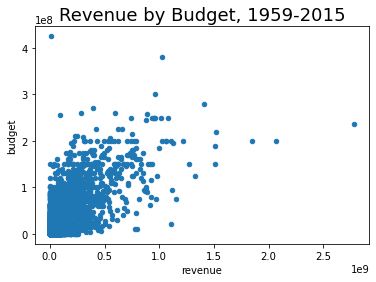

In [52]:
data.plot(x='revenue', y='budget', kind='scatter');
plt.title('Revenue by Budget, 1959-2015', size=18)

Text(0.5, 1.0, 'Revenue by Profit, 1959-2015')

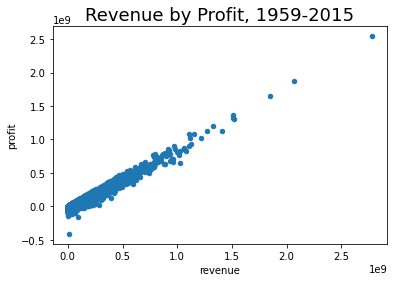

In [53]:
data.plot(x='revenue', y='profit', kind='scatter');
plt.title('Revenue by Profit, 1959-2015', size=18)


Text(0.5, 1.0, 'Revenue by Profit ratio, 1959-2015')

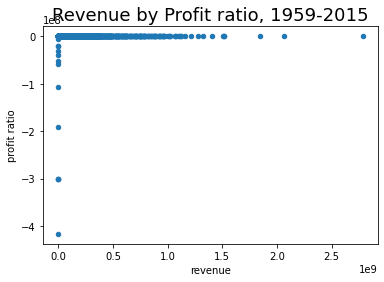

In [54]:
data.plot(x='revenue', y='profit ratio', kind='scatter');
plt.title('Revenue by Profit ratio, 1959-2015', size=18)


Text(0.5, 1.0, 'Revenue by Popularity, 1959-2015')

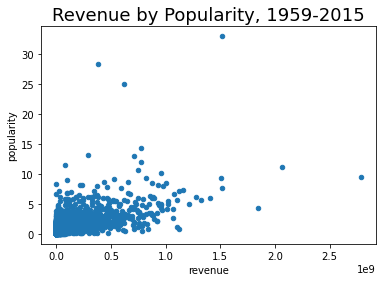

In [55]:
data.plot(x='revenue', y='popularity', kind='scatter');
plt.title('Revenue by Popularity, 1959-2015', size=18)

decades
sixties              8874086.87345
seventies           21465096.11927
eighties            29307431.12713
nineties            45583832.55860
two-thousands       45962580.60460
two-thousand-tens   39846358.83184
Name: revenue, dtype: float64


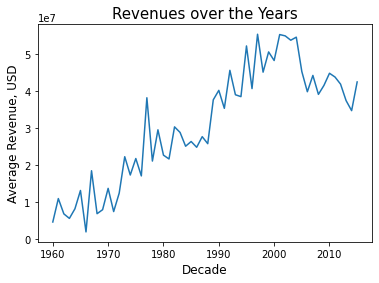

In [56]:
revenue = data.groupby('release_year')['revenue'].mean()
print(data.groupby('decades')['revenue'].mean())
plt.plot(revenue)
plt.title('Revenues over the Years', size=15);
plt.xlabel('Decade', size=12)
plt.ylabel('Average Revenue, USD', size=12);


In [57]:
(max(data.groupby('release_year')['revenue'].mean())-min(data.groupby('release_year')['revenue'].mean()))/min(data.groupby('release_year')['revenue'].mean())

29.12628827928164

Revenues over the years have increased on average by 29%

In [58]:
data_top_fifty = data.sort_values(by=['revenue'], ascending=False).head(50)
data_top_fifty['original_title'].nunique


<bound method IndexOpsMixin.nunique of 1386                                                Avatar
3                             Star Wars: The Force Awakens
5231                                               Titanic
4361                                          The Avengers
0                                           Jurassic World
4                                                Furious 7
14                                 Avengers: Age of Ultron
3374          Harry Potter and the Deathly Hallows: Part 2
5422                                                Frozen
5425                                            Iron Man 3
8                                                  Minions
3522                        Transformers: Dark of the Moon
4949         The Lord of the Rings: The Return of the King
4365                                               Skyfall
8094                                               The Net
4363                                 The Dark Knight Rises
6555            P

In [59]:
data_top_fifty.describe()

,runtime,release_year,vote_average,vote_count,popularity,budget,revenue,budget_adj,revenue_adj,profit,profit ratio
count,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000
mean,138.12000,2008.16000,7.00600,3986.92000,5.83538,168940000.00000,1088203811.94000,172880947.88040,1141206589.25600,919263811.94000,83.84213
std,26.96077,5.86014,0.61757,2037.73925,4.63380,72896182.81767,358316264.71185,67978575.37054,384112409.74603,348052821.49263,7.33014
min,88.00000,1993.00000,5.60000,201.00000,0.76050,22000000.00000,816969268.00000,31481271.08000,785411574.70000,632871626.00000,62.80647
25%,121.75000,2004.25000,6.50000,2863.00000,3.47466,113500000.00000,882177661.00000,121187601.32500,949128230.47500,711105863.00000,80.52697
50%,142.00000,2010.00000,7.15000,3375.50000,4.96026,155000000.00000,959700000.00000,167994413.55000,1039781131.50000,803002187.50000,84.33577
75%,152.75000,2012.75000,7.40000,4999.00000,6.98966,215000000.00000,1116306987.50000,223133383.52500,1200066399.75000,993766744.50000,89.28801
max,201.00000,2015.00000,8.10000,9767.00000,32.98576,380000000.00000,2781505847.00000,368371256.20000,2827123750.00000,2544505847.00000,98.01135


The minimum revenue for the top 50 movies is 6.328716e+08


Now let's see which genres encompass the top grossing 50 and do not


In [60]:
below_fifty = data_split_genre.query('revenue < 6.328716e+08')
top_fifty = data_split_genre.query('revenue >= 6.328716e+08')
print(below_fifty['genre_split'].value_counts().nlargest(5))
print(top_fifty['genre_split'].value_counts().nlargest(5))


Drama       4748
Comedy      3780
Thriller    2890
Action      2336
Romance     1705
Name: genre_split, dtype: int64
Adventure          70
Action             48
Fantasy            39
Family             30
Science Fiction    29
Name: genre_split, dtype: int64


Dramas however frequent they are not in the top 50 movies made. Adventure movies are generally 
in the top 50 movies, followed by Action , Fantasy, Family and Science Fiction

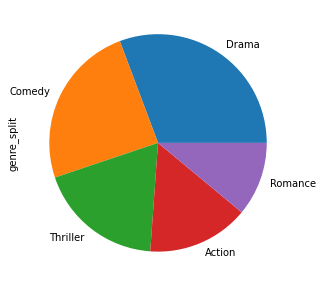

In [61]:
below_fifty['genre_split'].value_counts().nlargest(5).plot(kind='pie',figsize=(5,5));

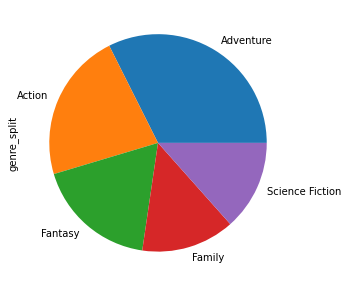

In [62]:
top_fifty['genre_split'].value_counts().nlargest(5).plot(kind='pie', figsize=(5,5));

- Dramas, Comedies and Thrillers make less revenues
- The top 50 movies producing high revenues are Action, Adventure and Fantasy

In [63]:
data['director'].value_counts().head(10)

Woody Allen          45
0                    44
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Name: director, dtype: int64

Woody Allen has the most acting credits followed by Clint Eastwood, Steven Spielberg, 
Martin Scorsese and Ridely Scott

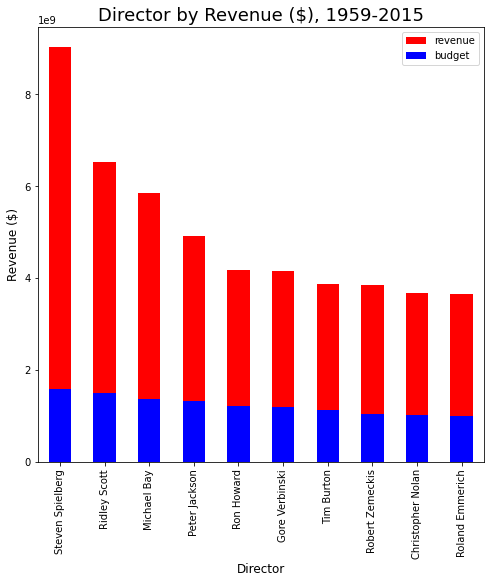

In [64]:
data_groupby_revenue3 = data.groupby(['director'])['revenue'].sum()
data_groupby_revenue4 = data.groupby(['director'])['budget'].sum()
d=data_groupby_revenue3.nlargest(10)
e=data_groupby_revenue4.nlargest(10)
plt.figure(figsize = (8, 8))
plt.title('Director by Revenue ($), 1959-2015', size=18)
d.plot(kind='bar', color='red')
e.plot(kind='bar', color='blue')
plt.legend()
ax = plt.xticks(rotation=90)
plt.xlabel('Director', size=12)
plt.ylabel('Revenue ($)', size=12);

Steven Spielberg has directed the highest grossing movies, followed by Ridely Scott and Michael Bay.

In [65]:
data['leading_actor'].value_counts().head(15)

0                        76
Nicolas Cage             50
Robert De Niro           42
Bruce Willis             39
Clint Eastwood           38
Sylvester Stallone       37
Tom Hanks                37
Johnny Depp              37
Jean-Claude Van Damme    35
Steven Seagal            35
John Travolta            33
Denzel Washington        33
Robin Williams           33
Tom Cruise               31
Steve Martin             30
Name: leading_actor, dtype: int64

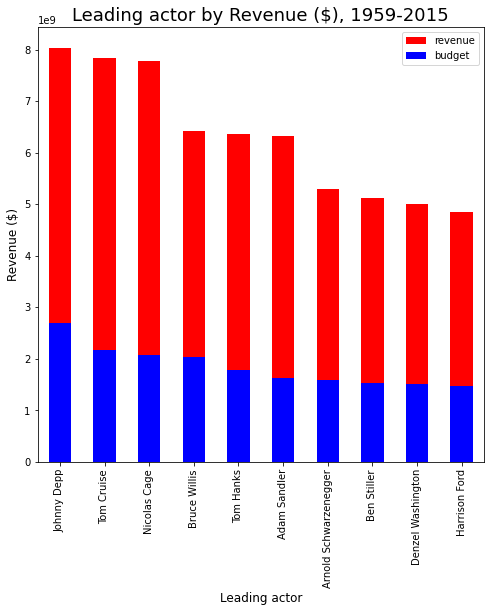

In [66]:
data_groupby_revenue3 = data.groupby(['leading_actor'])['revenue'].sum()
data_groupby_revenue4 = data.groupby(['leading_actor'])['budget'].sum()
d=data_groupby_revenue3.nlargest(10)
e=data_groupby_revenue4.nlargest(10)
plt.figure(figsize = (8, 8))
plt.title('Leading actor by Revenue ($), 1959-2015', size=18)
d.plot(kind='bar', color='red')
e.plot(kind='bar', color='blue')
plt.legend()
ax = plt.xticks(rotation=90)
plt.xlabel('Leading actor', size=12)
plt.ylabel('Revenue ($)', size=12);

Johny Depp, Tom Cruise and Nicola Cage have acted in the highest grossing films in relation to their budgets.

In [67]:
data['support_actor1'].value_counts().head(10)

0                  220
Diane Keaton        19
Julianne Moore      19
Morgan Freeman      17
Michael Caine       17
Tommy Lee Jones     16
Willem Dafoe        16
Gene Hackman        16
Dustin Hoffman      15
Susan Sarandon      15
Name: support_actor1, dtype: int64

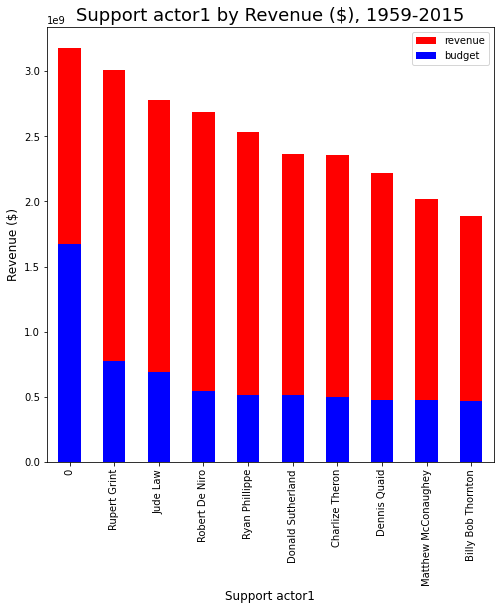

In [68]:
data_groupby_revenue3 = data.groupby(['support_actor1'])['revenue'].sum()
data_groupby_revenue4 = data.groupby(['support_actor1'])['budget'].sum()
d=data_groupby_revenue3.nlargest(10)
e=data_groupby_revenue4.nlargest(10)
plt.figure(figsize = (8, 8))
plt.title('Support actor1 by Revenue ($), 1959-2015', size=18)
d.plot(kind='bar', color='red')
e.plot(kind='bar', color='blue')
plt.legend()
ax = plt.xticks(rotation=90)
plt.xlabel('Support actor1', size=12)
plt.ylabel('Revenue ($)', size=12);

In [69]:
data['support_actor2'].value_counts().head(10)

0                  310
Susan Sarandon      15
Ed Harris           12
Harvey Keitel       12
Steve Buscemi       12
Rosario Dawson      12
Cameron Diaz        11
Woody Harrelson     11
John Leguizamo      11
Ned Beatty          11
Name: support_actor2, dtype: int64

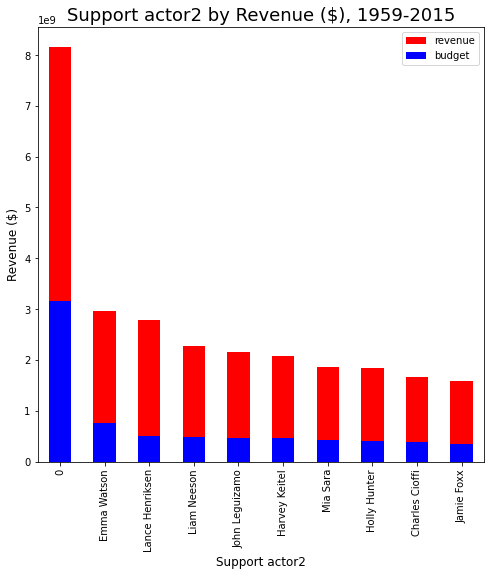

In [70]:
data_groupby_revenue3 = data.groupby(['support_actor2'])['revenue'].sum()
data_groupby_revenue4 = data.groupby(['support_actor2'])['budget'].sum()
d=data_groupby_revenue3.nlargest(10)
e=data_groupby_revenue4.nlargest(10)
plt.figure(figsize = (8, 8))
plt.title('Support actor2 by Revenue ($), 1959-2015', size=18)
d.plot(kind='bar', color='red')
e.plot(kind='bar', color='blue')
plt.legend()
ax = plt.xticks(rotation=90)
plt.xlabel('Support actor2', size=12)
plt.ylabel('Revenue ($)', size=12);

In [71]:
data['support_actor3'].value_counts().head(15)

0                     419
Woody Harrelson        12
Ray Liotta             12
Christopher Walken     11
Joan Cusack            11
Tom Wilkinson          11
Robin Wright           11
Paul Giamatti          11
Vincent D'Onofrio      10
Ron Perlman            10
Bill Nighy             10
Juliette Lewis         10
Alfred Molina          10
Stanley Tucci          10
Samuel L. Jackson      10
Name: support_actor3, dtype: int64

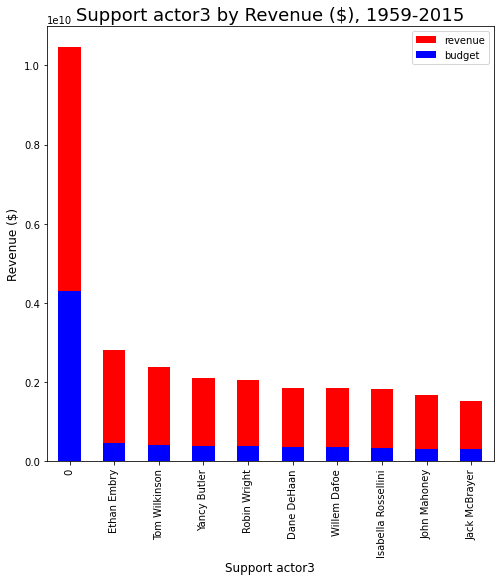

In [72]:
data_groupby_revenue3 = data.groupby(['support_actor3'])['revenue'].sum()
data_groupby_revenue4 = data.groupby(['support_actor3'])['budget'].sum()
d=data_groupby_revenue3.nlargest(10)
e=data_groupby_revenue4.nlargest(10)
plt.figure(figsize = (8, 8))
plt.title('Support actor3 by Revenue ($), 1959-2015', size=18)
d.plot(kind='bar', color='red')
e.plot(kind='bar', color='blue')
plt.legend()
ax = plt.xticks(rotation=90)
plt.xlabel('Support actor3', size=12)
plt.ylabel('Revenue ($)', size=12);

In [73]:
data['support_actor4'].value_counts().head(15)

0                     732
Steve Buscemi          12
Richard Jenkins        11
John Hurt              11
Bruce McGill           10
Brendan Gleeson         9
Ving Rhames             9
Bruce Greenwood         8
Tim Curry               8
Tom Wilkinson           8
Paddy Considine         8
Peter Stormare          8
Timothy Spall           8
David Morse             8
Charlotte Rampling      8
Name: support_actor4, dtype: int64

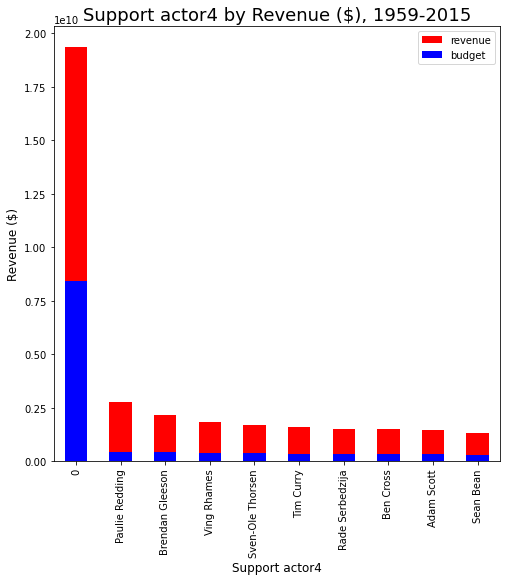

In [74]:
data_groupby_revenue3 = data.groupby(['support_actor4'])['revenue'].sum()
data_groupby_revenue4 = data.groupby(['support_actor4'])['budget'].sum()
d=data_groupby_revenue3.nlargest(10)
e=data_groupby_revenue4.nlargest(10)
plt.figure(figsize = (8, 8))
plt.title('Support actor4 by Revenue ($), 1959-2015', size=18)
d.plot(kind='bar', color='red')
e.plot(kind='bar', color='blue')
plt.legend()
ax = plt.xticks(rotation=90)
plt.xlabel('Support actor4', size=12)
plt.ylabel('Revenue ($)', size=12);

In [75]:
data_split_genre.groupby(['genre_split'])['budget'].mean()

genre_split
Action            27727820.33138
Adventure         37543694.53093
Animation         23159781.60658
Comedy            13297915.61824
Crime             17663801.12482
Documentary         577149.14808
Drama             11880717.77353
Family            23359337.42080
Fantasy           32612585.34825
Foreign            1451434.92553
History           18594919.30240
Horror             6226529.21075
Music              9438627.54902
Mystery           16119270.06296
Romance           12531271.84755
Science Fiction   24972680.52400
TV Movie            267664.67066
Thriller          17207693.76918
War               20891886.10370
Western           18974107.97576
Name: budget, dtype: float64

In [76]:
data_split_genre.groupby(['genre_split'])['runtime'].mean()

genre_split
Action            104.91779
Adventure         106.17335
Animation          68.18169
Comedy             96.74506
Crime             106.91728
Documentary       102.65192
Drama             110.47815
Family             89.60357
Fantasy           100.73690
Foreign           107.22872
History           136.20659
Horror             94.42456
Music             105.13725
Mystery           105.92840
Romance           106.89136
Science Fiction    99.41985
TV Movie           91.98204
Thriller          103.24768
War               127.62593
Western           117.57576
Name: runtime, dtype: float64

In [77]:
 data[['budget','revenue','profit','profit ratio', 'original_title','genres','leading_actor','support_actor1','support_actor2','support_actor3','support_actor4','release_date']].sort_values(by='revenue', ascending=False).head(10)


,budget,revenue,profit,profit ratio,original_title,genres,leading_actor,support_actor1,support_actor2,support_actor3,support_actor4,release_date
1386,237000000,2781505847,2544505847,91.47944,Avatar,Action|Adventure|Fantasy|Science Fiction,Sam Worthington,Anne Bobby,David Cronenberg,Charles Haid,Hugh Quarshie,10/12/2009
3,200000000,2068178225,1868178225,90.32965,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,Harrison Ford,Mia Wasikowska,Wallace Shawn,Noah Taylor,Rade Serbedzija,15/12/2015
5231,200000000,1845034188,1645034188,89.16009,Titanic,Drama|Romance|Thriller,Kate Winslet,Andie MacDowell,James Fleet,Simon Callow,John Hannah,18/11/1997
4361,220000000,1519557910,1299557910,85.52210,The Avengers,Science Fiction|Action|Adventure,Robert Downey Jr.,Karen Carlson,Lee Van Cleef,Art Hindle,Carol Bagdasarian,25/04/2012
0,150000000,1513528810,1363528810,90.08939,Jurassic World,Action|Adventure|Science Fiction|Thriller,Chris Pratt,Jessica Brown Findlay,Russell Crowe,William Hurt,Jennifer Connelly,09/06/2015
4,190000000,1506249360,1316249360,87.38589,Furious 7,Action|Crime|Thriller,Vin Diesel,Daryl Hannah,Virginia Madsen,Camryn Manheim,Wanda Sykes,01/04/2015
14,280000000,1405035767,1125035767,80.07168,Avengers: Age of Ultron,Action|Adventure|Science Fiction,Robert Downey Jr.,Emma Stone,Jamie Foxx,Dane DeHaan,Colm Feore,22/04/2015
3374,125000000,1327817822,1202817822,90.58606,Harry Potter and the Deathly Hallows: Part 2,Adventure|Family|Fantasy,Daniel Radcliffe,Albert Brooks,Holly Hunter,Robert Prosky,Lois Chiles,07/07/2011
5422,150000000,1274219009,1124219009,88.22808,Frozen,Animation|Adventure|Family,Kristen Bell,Ving Rhames,Colm Meaney,Freddy Rodríguez,Charlie Bewley,27/11/2013
5425,200000000,1215439994,1015439994,83.54505,Iron Man 3,Action|Adventure|Science Fiction,Robert Downey Jr.,Jolene Andersen,Nick Eversman,Jay Gillespie,Stephan Smith Collins,18/04/2013


# Conclusions

- Drama, Comedy, Thriller and Action movies are the most popular genres comprising about 
50% of all movies from 1959-2015
- In each decade Drama has proved the most popular ecpet for the 80s where Comedies were
- Runtimes have increased over time
- Revenues have increased by on average 29% from 1960-2015
- Though Drama, Comedy, Thriller movies are very popular the ghighest grossing movies are Adventure, 
Action and Fantasy movies
- Revenue and budget have a weak postive correlation
- Higher revenue movies are not always more popular


### Limitations

- We have focused on revenue as opposed to voter popularity but the relationship between the the two 
was shown to be weak
- Even so the popularity measure is very subjective and can come from a range of sources, so it is 
no a reliable measure
- Perhaps more data could be gathered such as a lanugage column, to get a view of the demographic of
audience we aime towards with each movie

### Suggestions

These suggestions have been made on the basis of creating a high grossing box office hit. So although, dramas perform well enough in revenues and very well in term of popularity, a main focus has been placed on potential revenues.

- The tagline for the movie should be Assassin, Hero or Legend.
- The keyword woman director, independent movie or based on a novel. Woman director would be ideal for our purposes
- The genre should be action
- The runtime should be up to 105 minutes
- The director should be Steven Spielberg
- The budget should be up to $30 million
- The release date should be 2022 December seeing as the high grossing action movies start viewing in December


I believe our movie should cast Tom Cruise in the leading role based on the revenue output 
of the films he was in, in relation to their budgets and the following
- support_actor1: Rupert Grint
- support_actor2: Emma Watson
- support_actor3: Ethan Embry
- support_actor4: Paulie Redding
For the cast of this movie this would be the ideal line up seeing as these actors have performed 
so well in their movies but should their pay be out of our budget range we should look at the next best three earning options in each category.

The next stage for this project would be to create a predictive model which would allow us to predict future revene based on 
criteria like the ones I have stated. The infromation presented currently gives us the big picture. 
